<a href="https://colab.research.google.com/github/Sarath027/Machine_Learning_Project/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Adding Kaggle.json to access kaggleAPI
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Downloading Fruits-360 dataset from kaggle
! kaggle datasets download moltean/fruits


401 - Unauthorized


In [ ]:
# Unzipping the dataset
!unzip fruits.zip


unzip:  cannot find or open fruits.zip, fruits.zip.zip or fruits.zip.ZIP.


In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import models, layers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
os.chdir('/content/fruits-360_dataset/fruits-360')
os.getcwd()


'/content/fruits-360_dataset/fruits-360'

In [ ]:
BATCH_SIZE = 32
NUM_CLASSES = 70
EPOCHS = 50
MODEL_NAME = "Fruits_360.h5"
SAVE_PATH = ""

PATH_TRAINING_DATA = 'Training/'
PATH_TEST_DATA = 'Test/'

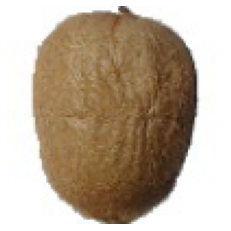

(100, 100, 3)


In [ ]:
#Displaying the image
img = load_img(PATH_TRAINING_DATA + "Kiwi/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

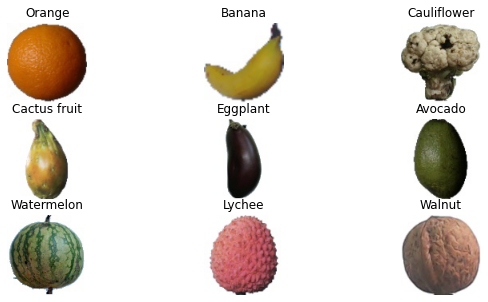

In [ ]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(PATH_TRAINING_DATA + images[i] +"/0_100.jpg", target_size=(100,100)))

In [ ]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(PATH_TRAINING_DATA):
    for image_filename in os.listdir(PATH_TEST_DATA + i):
        fruits.append(i)
        fruits_image.append(i + '/' + image_filename)

#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits


Top 10 frequent Fruits:


[('Grape Blue', 328),
 ('Plum 3', 304),
 ('Walnut', 249),
 ('Tomato 3', 246),
 ('Strawberry Wedge', 246),
 ('Tomato 1', 246),
 ('Cherry Rainier', 246),
 ('Cherry 2', 246),
 ('Peach 2', 246),
 ('Melon Piel de Sapo', 246)]

In [ ]:
#Finding number of classes
className = glob(PATH_TRAINING_DATA + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [ ]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

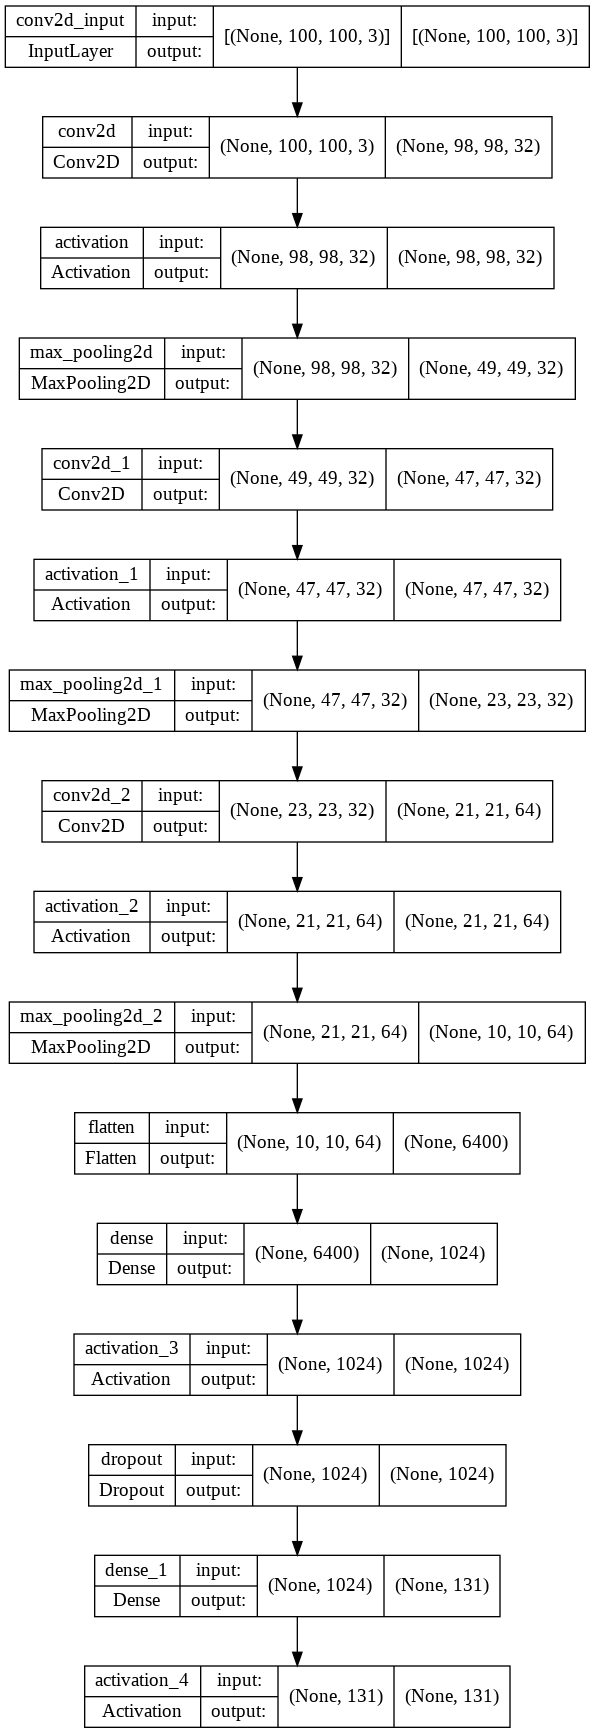

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compiling the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [ ]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = PATH_TRAINING_DATA,
target_size= (100, 100),
batch_size = BATCH_SIZE,
color_mode= "rgb",
class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
directory = PATH_TEST_DATA,
target_size= (100, 100),
batch_size = BATCH_SIZE,
color_mode= "rgb",
class_mode= "categorical")


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // BATCH_SIZE,
epochs=EPOCHS,
validation_data = test_generator,
validation_steps = 800 // BATCH_SIZE)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


50/50 [==============================] - 37s 735ms/step - loss: 0.2470 - accuracy: 0.9150 - val_loss: 0.2163 - val_accuracy: 0.9450
Epoch 2/50
50/50 [==============================] - 26s 521ms/step - loss: 0.2195 - accuracy: 0.9287 - val_loss: 0.2419 - val_accuracy: 0.9225
Epoch 3/50
50/50 [==============================] - 26s 518ms/step - loss: 0.3544 - accuracy: 0.8900 - val_loss: 0.1841 - val_accuracy: 0.9513
Epoch 4/50
50/50 [==============================] - 27s 538ms/step - loss: 0.2207 - accuracy: 0.9256 - val_loss: 0.1556 - val_accuracy: 0.9575
Epoch 5/50
50/50 [==============================] - 26s 518ms/step - loss: 0.1805 - accuracy: 0.9488 - val_loss: 0.1813 - val_accuracy: 0.9425
Epoch 6/50
50/50 [==============================] - 26s 522ms/step - loss: 0.1550 - accuracy: 0.9450 - val_loss: 0.1055 - val_accuracy: 0.9588
Epoch 7/50
50/50 [==============================] - 27s 544ms/step - loss: 0.1308 - accuracy: 0.9550 - val_loss: 0.1274 - val_accuracy: 0.9513
Epoch 8/50

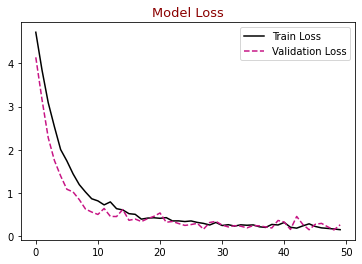

In [ ]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()


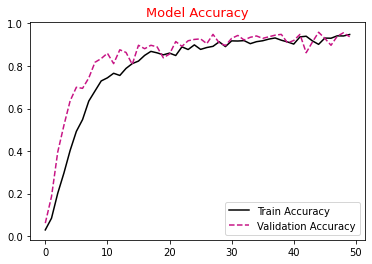

In [ ]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "red", size = 13)
plt.legend()
plt.show()